In [1]:
using Pkg;
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/Dropbox/Projects/github_testing/ConstrainTNet.jl`
Precompiling project...
  ✓ ITensors
  ✓ ConstrainTNet
  2 dependencies successfully precompiled in 13 seconds. 96 already precompiled.


In [2]:
using ConstrainTNet

In [12]:
difference(a,b)

4-element Vector{Rectangle}:
 Rectangle(0, 0, 1, 0)
 Rectangle(0, 1, 0, 1)
 Rectangle(0, 1, 0, 2)
 Rectangle(1, 0, 2, 0)

In [36]:
using Revise 
import ITensors: Box, intersection, difference 
using TimerOutputs 
const to = TimerOutput()
min_corners = [0, 0]
max_corners = [2, 2]
a = Box(min_corners, max_corners)

min_corners = [1, 1]
max_corners = [3, 3]
b = Box(min_corners, max_corners)
#=
inter = intersection(a, b)
diffab = difference(a, b)
diff1 = difference(diffab[1], diffab[2])
inter12 = intersection(diffab[1], diffab[2])
diff2 = difference(diffab[2], diffab[1])
@show diffab, diff1, inter12, diff2

c = Box([2,2],[4,2])
difference(a,c)
=#
# difference between 2 3d cubes giving 1 box as outcome 
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]
a = Box(min_corners, max_corners)

min_corners = [0, 1, 0]
max_corners = [3, 3, 3]
b = Box(min_corners, max_corners)

print(" 1 box: ", difference(a, b), "\n")

# difference between 2 3d cubes giving 2 boxes as outcome 
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]
a = Box(min_corners, max_corners)

min_corners = [1, 1, 0]
max_corners = [3, 3, 3]
b = Box(min_corners, max_corners)

print(" 2 boxes: ", difference(a, b), "\n")

@timeit to "diff" begin 
    difference(a,b)
end

show(to)
# difference between 2 3d cubes giving 3 boxes as outcome 
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]
a = Box(min_corners, max_corners)

min_corners = [1, 1, 1]
max_corners = [3, 3, 3]
b = Box(min_corners, max_corners)

print(" 3 boxes: ", difference(a, b), "\n") 
a = [1 2;3 4]



 1 box: [Box([0, 0, 0], [1, 0, 1])]
 2 boxes: [Box([0, 1, 0], [0, 1, 1]), Box([0, 0, 0], [1, 0, 1])]
 ────────────────────────────────────────────────────────────────────
                            Time                    Allocations      
                   ───────────────────────   ────────────────────────
 Tot / % measured:     10.8ms /   0.6%           89.8KiB /   1.9%    

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 diff           1   62.7μs  100.0%  62.7μs   1.72KiB  100.0%  1.72KiB
 ──────────────────────────────────────────────────────────────────── 3 boxes: [Box([0, 1, 1], [0, 1, 1]), Box([0, 0, 1], [1, 0, 1]), Box([0, 0, 0], [1, 1, 0])]


LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///Users/javier/Dropbox/Projects/tensor_networks/ITensors.jl/src/qn/In[36]#61:10\[90mIn[36]:61:10[0;0m]8;;\
a = [1 2;3 4]
typeof(a.[48;2;120;70;70m′[0;0m)
[90m#        ╙ ── [0;0m[91munknown unicode character '′'[0;0m

 Section   ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────
 diff           1   28.4μs  100.0%  28.4μs   1.88KiB  100.0%  1.88KiB

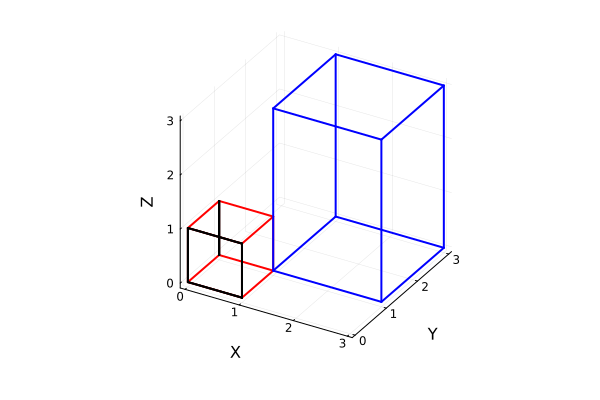

In [2]:
using Plots

plot()
function plot_3d_box(min_corner, max_corner; color=:blue)
    x = [min_corner[1], max_corner[1]]
    y = [min_corner[2], max_corner[2]]
    z = [min_corner[3], max_corner[3]]

    plot!([x[1], x[1]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[1], x[2]], [y[1], y[1]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[1], y[1]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[2], x[2]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)

end

# Example usage:
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]

plot_3d_box(min_corners, max_corners, color=:red)

min_corners = [1, 1, 0]
max_corners = [3, 3, 3]

plot_3d_box(min_corners, max_corners, color=:blue)

#Box[Box([0, 0, 0], [1, 0, 1])]
#Box[Box([0, 1, 0], [0, 1, 1]), Box([0, 0, 0], [1, 0, 1])] 
#Box[Box([0, 1, 1], [0, 1, 1]), Box([0, 0, 1], [1, 0, 1]), Box([0, 0, 0], [1, 1, 0])] 
min_corners = [0, 1, 0]
max_corners = [0, 1, 1]

plot_3d_box(min_corners, max_corners, color=:black)

min_corners = [0, 0, 0]
max_corners = [1, 0, 1]

plot_3d_box(min_corners, max_corners, color=:black)
#=
min_corners = [0, 0, 0]
max_corners = [1, 1, 0]

plot_3d_box(min_corners, max_corners, color=:black)
=#
plot!(xlabel="X", ylabel="Y", zlabel="Z", legend=false)
plot!()  # Show the plot


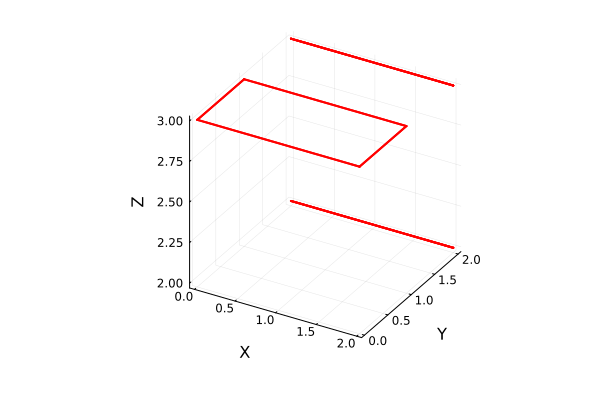

In [4]:
#Box([2, 0, 0, 3], [2, 2, 1, 3]), Box([2, 0, 2, 2], [2, 2, 2, 2]), Box([2, 0, 2, 3], [2, 2, 2, 3])
# 15: QRegion([Box([0, 0, 3, 4], [2, 2, 3, 4]), Box([0, 2, 3, 2], [2, 2, 3, 2]), Box([0, 2, 3, 3], [2, 2, 3, 3]), Box([2, 0, 0, 4], [2, 2, 2, 4]), Box([2, 0, 3, 2], [2, 1, 3, 2]), Box([2, 0, 3, 3], [2, 1, 3, 3])]) => 1


plot()

min_corners = [0, 0, 3]
max_corners = [2, 1, 3]

plot_3d_box(min_corners, max_corners, color=:red)

min_corners = [0, 2, 2]
max_corners = [2, 2, 2]

plot_3d_box(min_corners, max_corners, color=:red)

min_corners = [0, 2, 3]
max_corners = [2, 2, 3]

plot_3d_box(min_corners, max_corners, color=:red)

plot!(xlabel="X", ylabel="Y", zlabel="Z", legend=false)
plot!()  # Show the plot

In [52]:
function generate_combinations(lower_bound::Vector{Int}, upper_bound::Vector{Int}; current_combination::Vector{Int}=Vector{Int}(), dimension::Int=1)::Vector{Vector{Int}}
    if dimension > length(lower_bound)
        return [current_combination]
    else
        combinations = Vector{Vector{Int}}()
        for i in lower_bound[dimension]:upper_bound[dimension]
            append!(combinations, generate_combinations(lower_bound, upper_bound, current_combination=[current_combination...; i], dimension=dimension + 1))
        end
        return combinations
    end
end

lower_bound = [1, 1, 2]
upper_bound = [2, 3, 4]

combinations = generate_combinations(lower_bound, upper_bound)



18-element Vector{Vector{Int64}}:
 [1, 1, 2]
 [1, 1, 3]
 [1, 1, 4]
 [1, 2, 2]
 [1, 2, 3]
 [1, 2, 4]
 [1, 3, 2]
 [1, 3, 3]
 [1, 3, 4]
 [2, 1, 2]
 [2, 1, 3]
 [2, 1, 4]
 [2, 2, 2]
 [2, 2, 3]
 [2, 2, 4]
 [2, 3, 2]
 [2, 3, 3]
 [2, 3, 4]

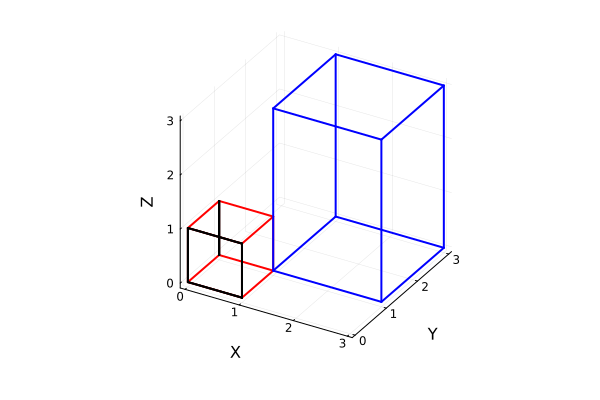

In [54]:
using Plots

plot()
function plot_3d_box(min_corner, max_corner; color=:blue)
    x = [min_corner[1], max_corner[1]]
    y = [min_corner[2], max_corner[2]]
    z = [min_corner[3], max_corner[3]]

    plot!([x[1], x[1]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[1], x[2]], [y[1], y[1]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[1], y[1]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[2], x[2]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)

end

min_corners = [0, 0, 0]
max_corners = [1, 1, 1]


# Example usage:
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]
a = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:red)

min_corners = [1, 1, 0]
max_corners = [3, 3, 3]
b = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:blue)

#Box[Box([0, 0, 0], [1, 0, 1])]
#Box[Box([0, 1, 0], [0, 1, 1]), Box([0, 0, 0], [1, 0, 1])]
#Box[Box([0, 1, 1], [0, 1, 1]), Box([0, 0, 1], [1, 0, 1]), Box([0, 0, 0], [1, 1, 0])]
min_corners = [0, 1, 0]
max_corners = [0, 1, 1]

plot_3d_box(min_corners, max_corners, color=:black)

min_corners = [0, 0, 0]
max_corners = [1, 0, 1]

plot_3d_box(min_corners, max_corners, color=:black)


plot!(xlabel="X", ylabel="Y", zlabel="Z", legend=false)
plot!()  # Show the plot


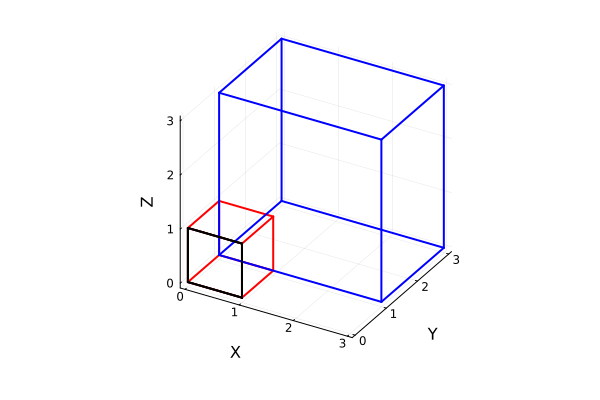

In [56]:
using Plots

plot()
function plot_3d_box(min_corner, max_corner; color=:blue)
    x = [min_corner[1], max_corner[1]]
    y = [min_corner[2], max_corner[2]]
    z = [min_corner[3], max_corner[3]]

    plot!([x[1], x[1]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[1]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[1], x[2]], [y[1], y[1]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[1], y[1]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[1], x[2]], [y[2], y[2]], [z[2], z[2]], color=color, label="", lw=2)

    plot!([x[2], x[2]], [y[1], y[2]], [z[1], z[1]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[2]], [z[2], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[1], y[1]], [z[1], z[2]], color=color, label="", lw=2)
    plot!([x[2], x[2]], [y[2], y[2]], [z[1], z[2]], color=color, label="", lw=2)

end

min_corners = [0, 0, 0]
max_corners = [1, 1, 1]


# Example usage:
min_corners = [0, 0, 0]
max_corners = [1, 1, 1]
a = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:red)

min_corners = [0, 1, 0]
max_corners = [3, 3, 3]
b = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:blue)

#Box[Box([0, 0, 0], [1, 0, 1])]
#Box[Box([0, 1, 0], [0, 1, 1]), Box([0, 0, 0], [1, 0, 1])]
#Box[Box([0, 1, 1], [0, 1, 1]), Box([0, 0, 1], [1, 0, 1]), Box([0, 0, 0], [1, 1, 0])]
min_corners = [0, 0, 0]
max_corners = [1, 0, 1]

plot_3d_box(min_corners, max_corners, color=:black)



plot!(xlabel="X", ylabel="Y", zlabel="Z", legend=false)
plot!()  # Show the plot


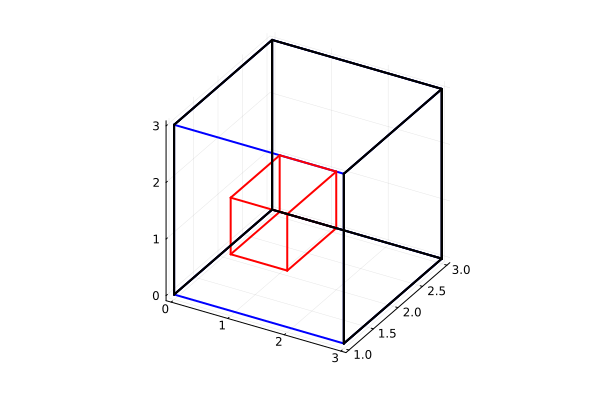

In [71]:
using ITensors
plot()

min_corners = [0, 1, 0]
max_corners = [3, 3, 3]
a = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:blue)

min_corners = [1, 1, 1]
max_corners = [2, 2, 2]
b = Box(min_corners, max_corners)
plot_3d_box(min_corners, max_corners, color=:red)

v = difference(a,b)

plot_3d_box(v[1].min_corner, v[1].max_corner, color=:black)

plot_3d_box(v[2].min_corner, v[2].max_corner, color=:black)

plot_3d_box(v[3].min_corner, v[3].max_corner, color=:black)

#plot_3d_box(v[4].min_corner, v[4].max_corner, color=:black)

#plot_3d_box(v[5].min_corner, v[5].max_corner, color=:black)



